# hyperparameter tuning

In [1]:
import numpy as np
import pandas as pd
import pandas.plotting
import seaborn as sns
import sklearn.manifold
import sklearn.preprocessing
import matplotlib.pyplot as plt
import warnings
plt.rcParams["figure.figsize"] = (13, 6)
%matplotlib inline
sns.set(context = "paper", font = "monospace")
warnings.filterwarnings("ignore")

# effects of statistics

In [2]:
statistics = pd.DataFrame(
    [
        [3,  0.733936, 0.0356701],
        [4,  1.93345,  0.474173 ],
        [5,  2.32638,  1.08165  ],
        [6,  0.777764, 0.139168 ],
        [7,  0.730978, 0.143426 ],
        [8,  0.741041, 0.0440106],
        [9,  1.06954,  0.17339  ],
        [10, 1.16116,  0.256664 ],
        [11, 0.874064, 0.141499 ],
        [12, 0.970295, 0.168859 ],
        [13, 1.02421,  0.231143 ],
        [14, 0.894721, 0.138635 ],
        [15, 0.997081, 0.254816 ],
        [16, 0.922942, 0.202778 ],
        [17, 0.952641, 0.163971 ],
        [18, 1.0577,   0.373658 ],
        [19, 0.946405, 0.218097 ],
        [20, 1.03403,  0.208517 ],
        [21, 0.916805, 0.121326 ],
        [22, 1.22349,  0.277259 ],
        [23, 1.08479,  0.273698 ],
        [24, 0.982249, 0.282863 ],
        [25, 1.03087,  0.252932 ],
        [26, 1.12369,  0.311178 ],
        [27, 0.97736,  0.201496 ],
        [28, 0.96646,  0.187252 ],
        [29, 0.939303, 0.19783  ],
        [30, 1.06671,  0.216453 ]
    ],
    columns = [
        "number of patients",
        "mean",
        "standard deviation"
    ]
)

In [3]:
statistics["absolute difference of mean from unity"] = np.vectorize(lambda x: abs(1 - x))(statistics["mean"].values)
statistics.head()

,number of patients,mean,standard deviation,absolute difference of mean from unity
0,3,0.733936,0.035670,0.266064
1,4,1.933450,0.474173,0.933450
2,5,2.326380,1.081650,1.326380
3,6,0.777764,0.139168,0.222236
4,7,0.730978,0.143426,0.269022


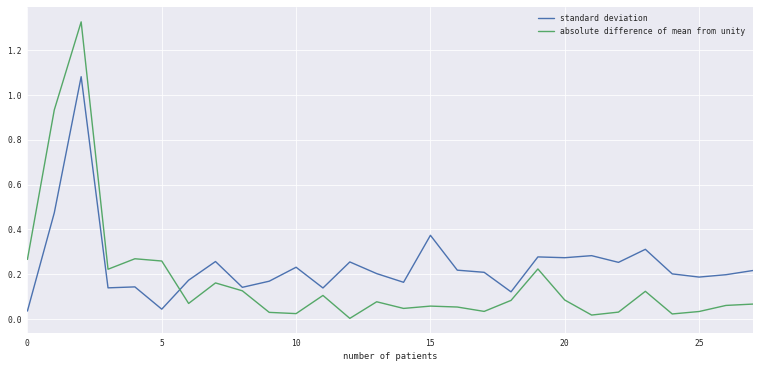

In [4]:
plt.rcParams["figure.figsize"] = (13, 6)
ax = statistics.plot(y = ["standard deviation", "absolute difference of mean from unity"], logy = False)
ax.set_xlabel("number of patients");

# hyperparameter tuning

## hyperparameters ordered by mean accuracy

In [5]:
results = pd.read_csv("2017-07-27T0503Z_results.csv")

print(len(results))
results.sort_values("accuracy_mean", ascending = False)#.head()

189


,epochs,learning_rate,number_nodes_layer,accuracy_mean,accuracy_standard_deviation
107,1000,0.001,300,15.661900,73.88270
128,5000,0.001,300,4.788680,25.97360
170,25000,0.001,300,2.064860,6.72409
115,1000,0.020,300,1.884360,4.91932
147,10000,0.001,200,1.506200,4.68729
137,5000,0.020,500,1.074350,6.04780
47,10000,0.010,200,1.000300,3.76759
54,10000,0.070,150,0.979587,3.48519
135,5000,0.020,250,0.936301,2.36578
133,5000,0.010,500,0.919568,2.96576


## hyperparameter correlations with mean accuracy and accuracy standard deviation

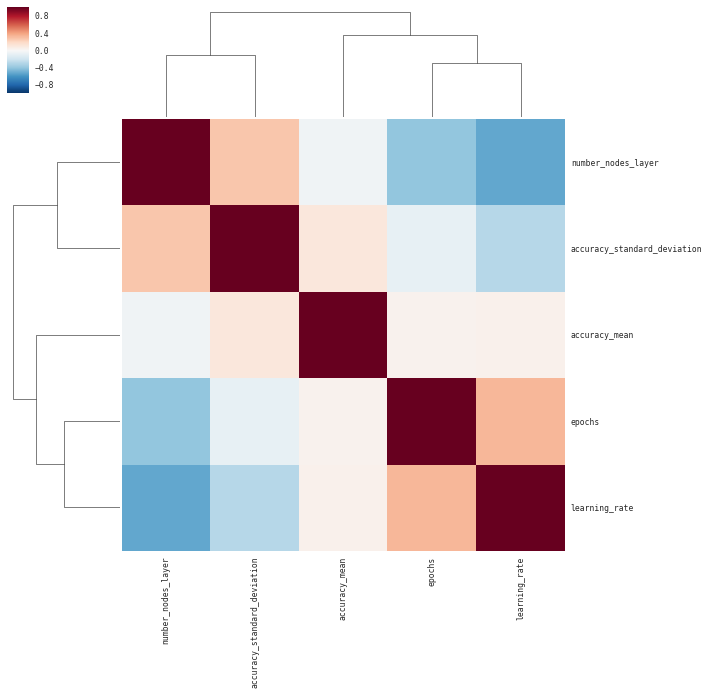

In [6]:
plot = sns.clustermap(results.corr())
plt.setp(plot.ax_heatmap.get_yticklabels(), rotation = 0);

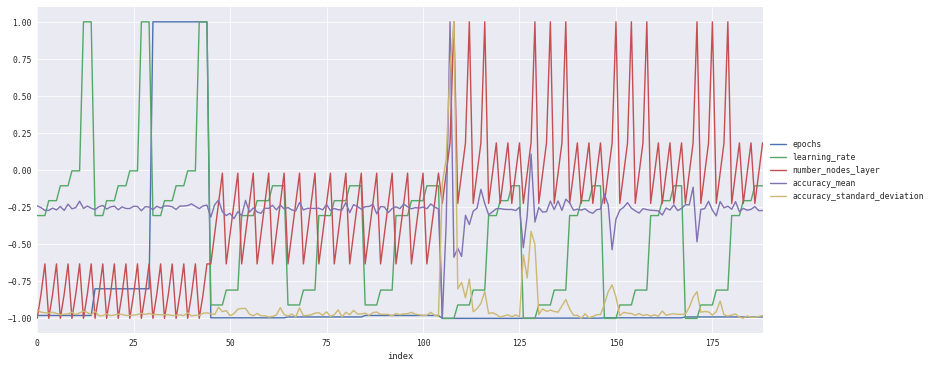

In [7]:
scaler = sklearn.preprocessing.MinMaxScaler(feature_range = (-1, 1))
results_scaled = pd.DataFrame(scaler.fit_transform(results), index = results.index, columns = results.columns)

plt.rcParams["figure.figsize"] = (13, 6)
ax = results_scaled.plot(y = ["epochs", "learning_rate", "number_nodes_layer", "accuracy_mean", "accuracy_standard_deviation"], logy = False)
ax.legend(loc = "center left", bbox_to_anchor = (1, 0.5))
ax.set_xlabel("index");

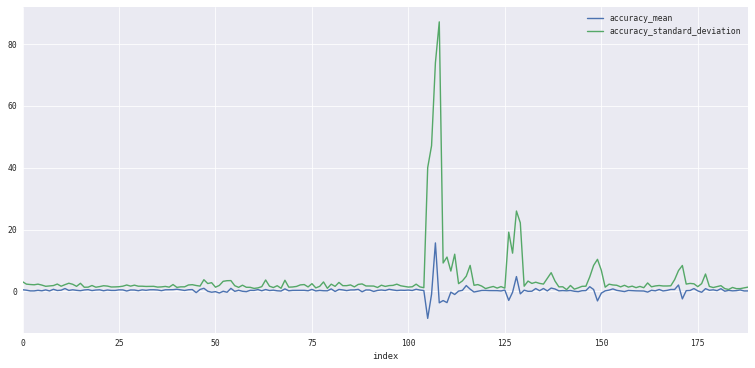

In [8]:
plt.rcParams["figure.figsize"] = (13, 6)
ax = results.plot(y = ["accuracy_mean", "accuracy_standard_deviation"], logy = False)
ax.set_xlabel("index");

## hyperparameter clusters

### parallel coordinates

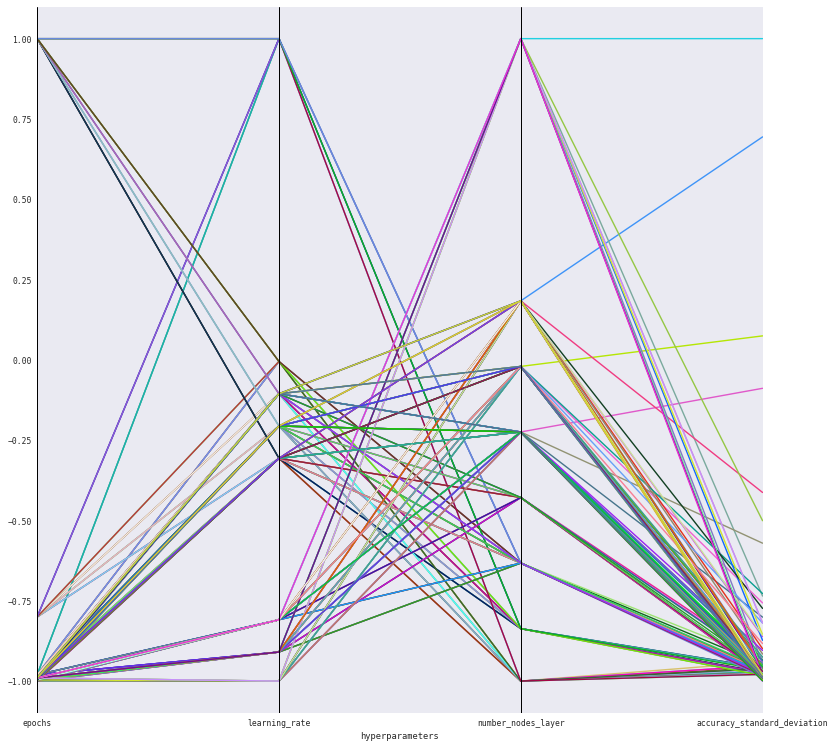

In [9]:
plt.rcParams["figure.figsize"] = (13, 13)
ax = pandas.plotting.parallel_coordinates(results_scaled, "accuracy_mean")
#ax.legend(loc = "center left", bbox_to_anchor = (1.1, 0.5))
ax.legend().remove()
ax.set_xlabel("hyperparameters");

### Andrews curves

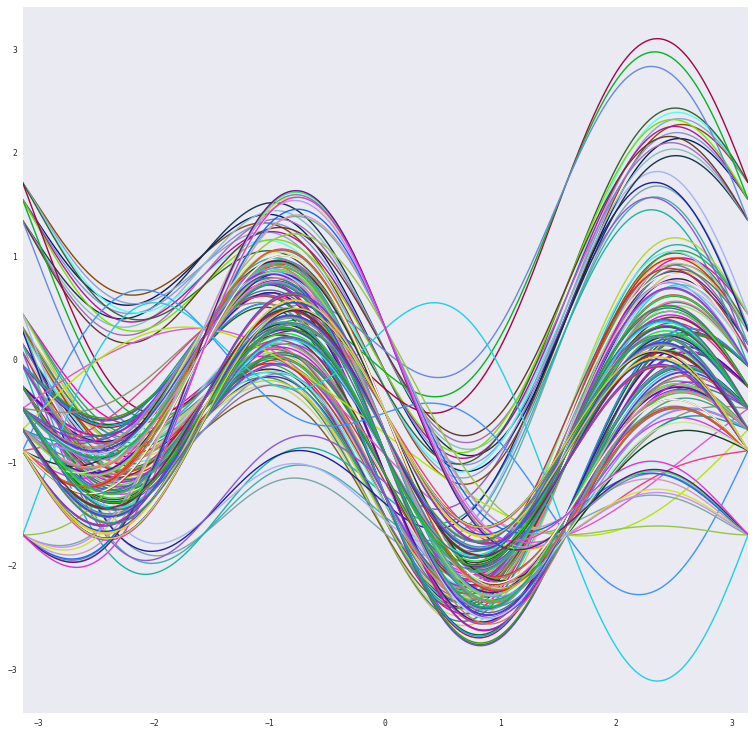

In [10]:
plt.rcParams["figure.figsize"] = (13, 13)
ax = pandas.plotting.andrews_curves(results_scaled, "accuracy_mean")
#plt.legend(loc = "center left", bbox_to_anchor = (1.1, 0.5))
ax.legend().remove()

# t-SNE

In [11]:
# add mean accuracy label
results["accuracy_mean_rounded"] = results["accuracy_mean"].round(1).astype(str)

# split data table into data X and class labels y
X = results_scaled[["epochs", "learning_rate", "number_nodes_layer", "accuracy_standard_deviation"]].values
y = results[["accuracy_mean"]].values

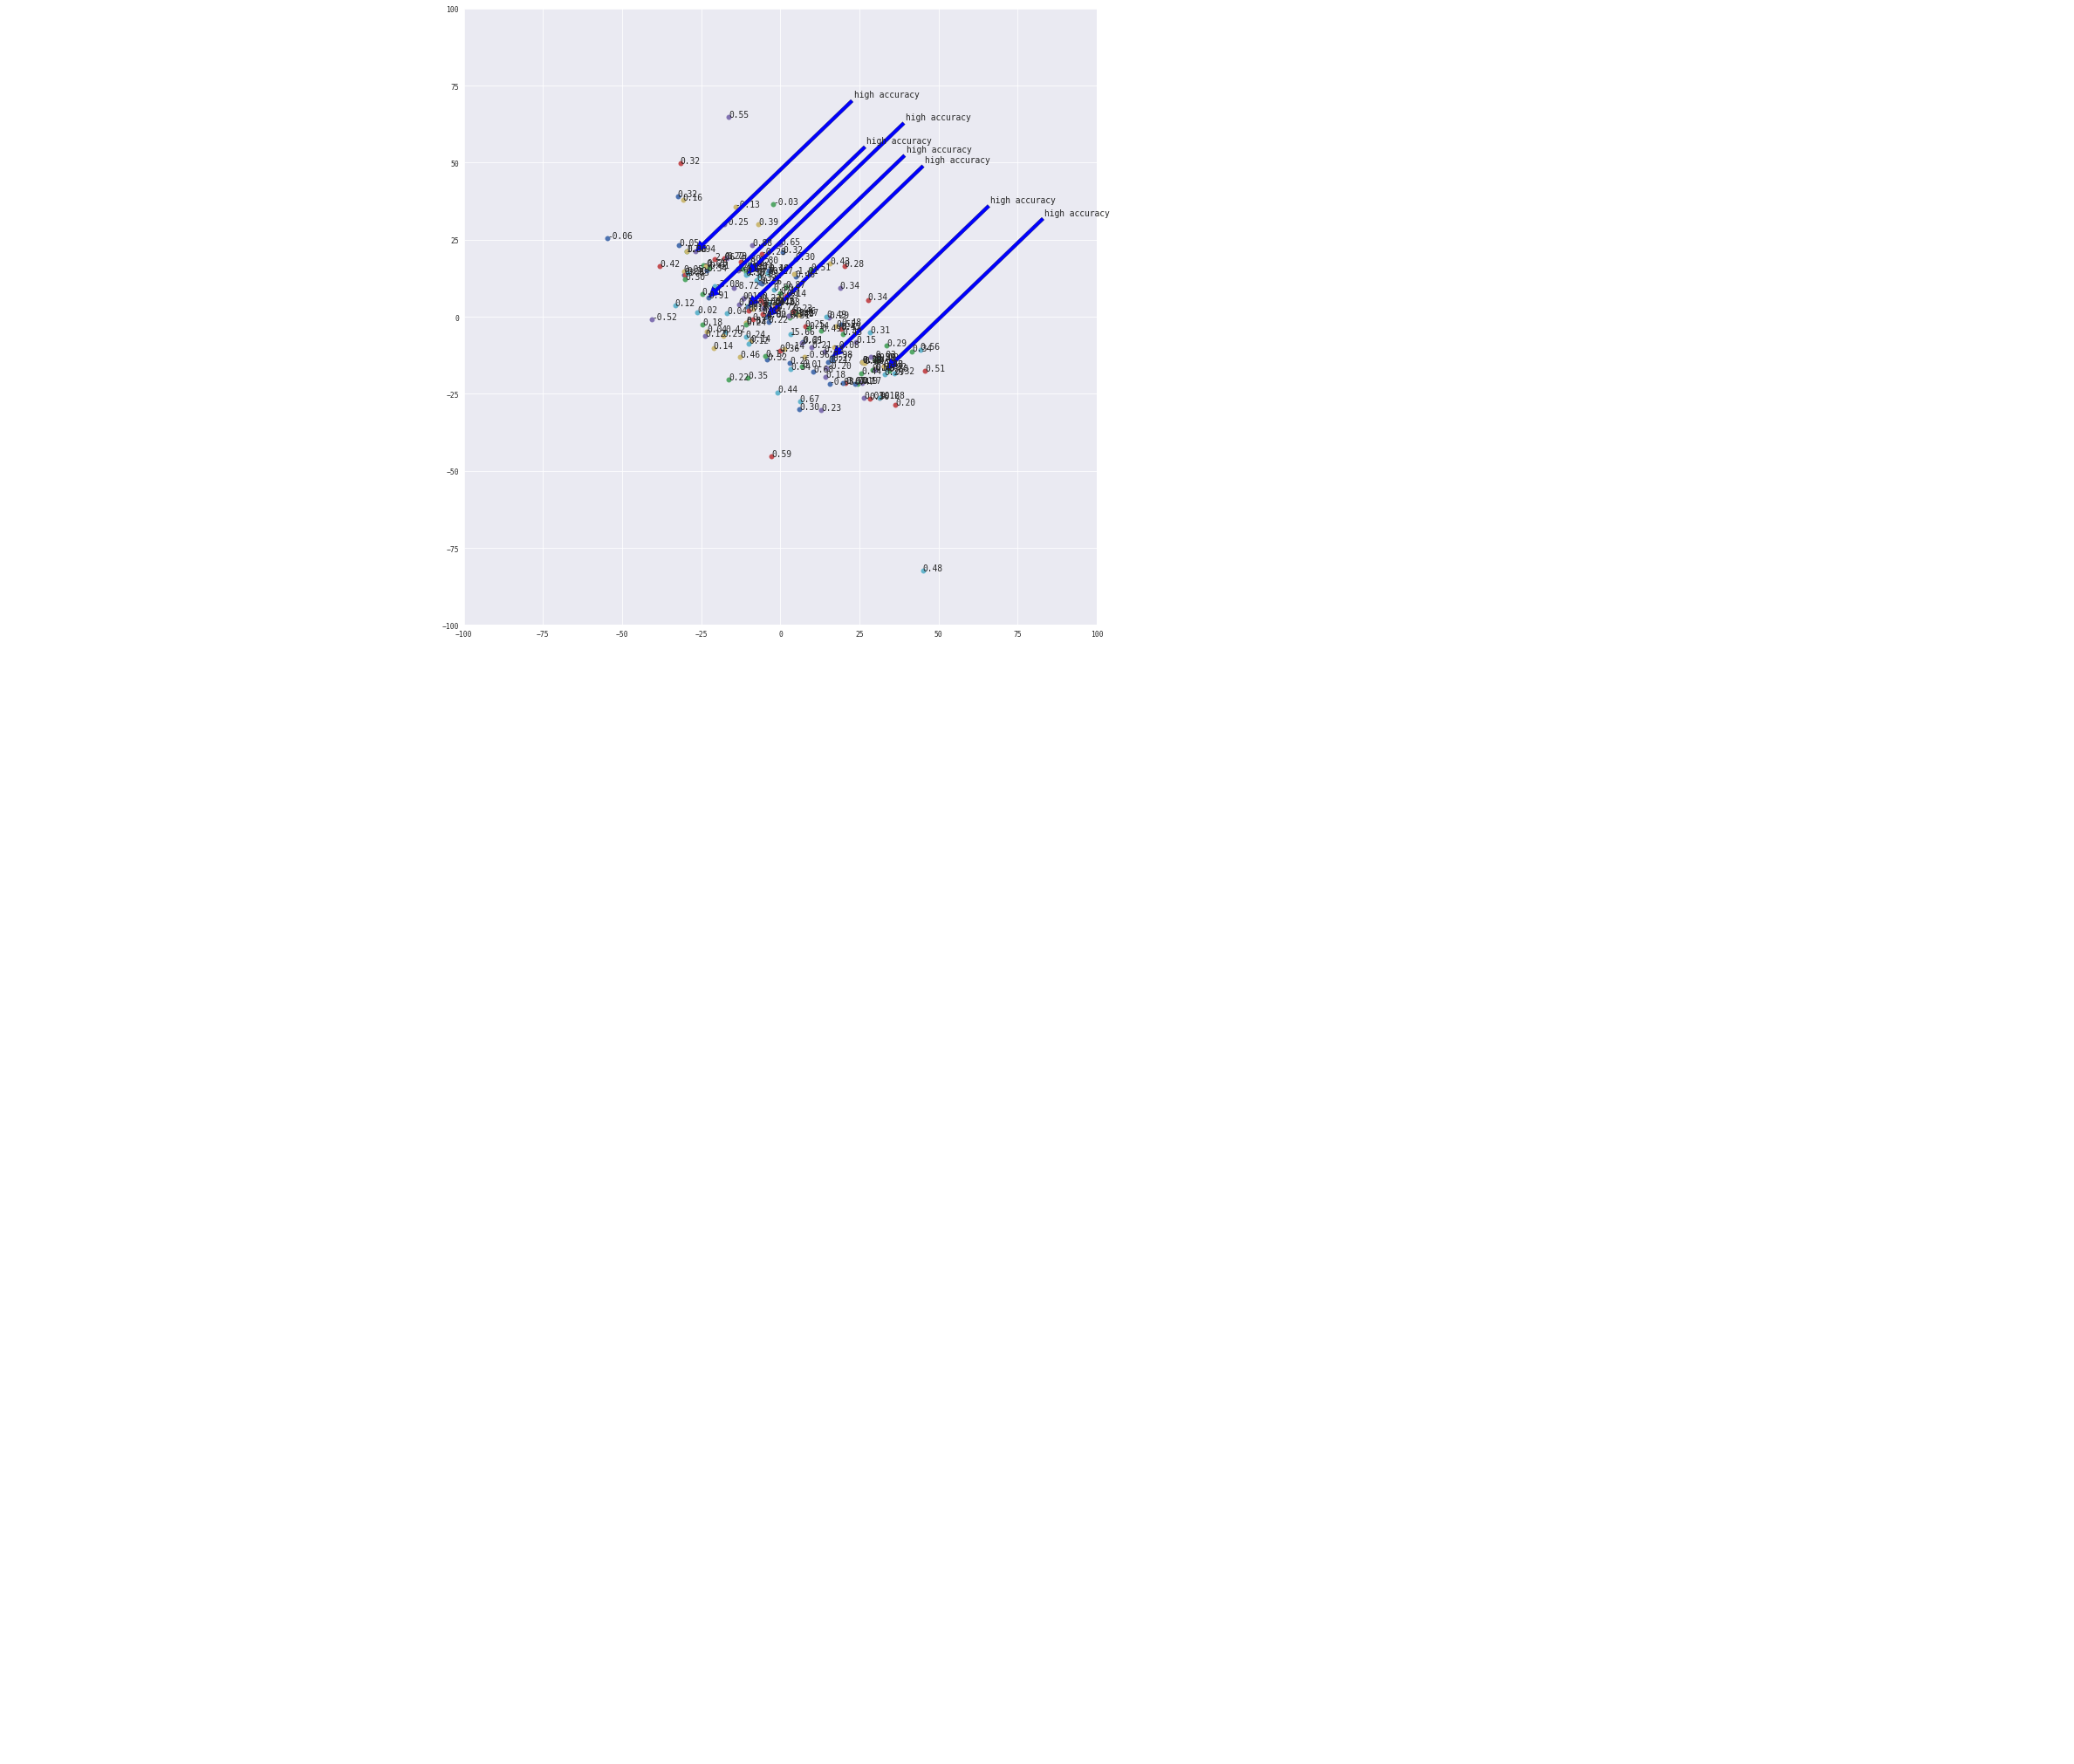

In [12]:
# t-SNE
Y = sklearn.manifold.TSNE(
    n_components = 4,
    init         = "pca",
    method       = "barnes_hut"
).fit_transform(X)

plt.rcParams["figure.figsize"] = (13, 13)

for point, label in zip(Y, y):
    plt.scatter(point[0], point[1], label = label[0])
    if 1.1 > label[0] > 0.9:
        plt.axes().annotate(
            "high accuracy",
            xy         = (point[0], point[1]),
            xytext     = (point[0] + 50, point[1] + 50),
            arrowprops = dict(
                facecolor = "blue",
                shrink    = 5
            ),
        )
    #plt.axes().annotate(label[0], (point[0], point[1]))https://lysergi.com
    plt.axes().annotate("{number:.2f}".format(number = label[0]), (point[0], point[1]))

plt.axes().set_xlim([-100, 100])
plt.axes().set_ylim([-100, 100])
plt.rcParams["figure.figsize"] = (13, 13)
#plt.axes().set_aspect(1 / plt.axes().get_data_ratio())
#plt.legend(loc = "center left", bbox_to_anchor = (1, 0.5))
plt.show()

# hyperparameters for high accuracy

In [13]:
results_high_accuracy = results[(results["accuracy_mean"] > 0.8) &  (results["accuracy_mean"] < 1.2)]
results_high_accuracy.sort_values("accuracy_mean", ascending = False)

,epochs,learning_rate,number_nodes_layer,accuracy_mean,accuracy_standard_deviation,accuracy_mean_rounded
137,5000,0.02,500,1.074350,6.04780,1.1
47,10000,0.01,200,1.000300,3.76759,1.0
54,10000,0.07,150,0.979587,3.48519,1.0
135,5000,0.02,250,0.936301,2.36578,0.9
133,5000,0.01,500,0.919568,2.96576,0.9
11,50000,0.10,100,0.915333,2.17735,0.9
174,25000,0.01,300,0.909112,2.45031,0.9
177,25000,0.02,250,0.882702,5.61378,0.9
181,25000,0.07,250,0.872685,1.84472,0.9
68,25000,0.01,250,0.804239,3.60109,0.8


In [14]:
scaler = sklearn.preprocessing.MinMaxScaler(feature_range = (-1, 1))

results_high_accuracy_scaled = pd.DataFrame(scaler.fit_transform(results_high_accuracy), index = results_high_accuracy.index, columns = results_high_accuracy.columns)
results_high_accuracy_scaled

,epochs,learning_rate,number_nodes_layer,accuracy_mean,accuracy_standard_deviation,accuracy_mean_rounded
11,1.000000,1.000000,-1.00,-0.162541,-0.841721,-0.333333
47,-0.777778,-1.000000,-0.50,0.458636,-0.085019,0.333333
54,-0.777778,0.333333,-0.75,0.307207,-0.219396,0.333333
68,-0.111111,-1.000000,-0.25,-0.974727,-0.164246,-1.000000
80,-0.111111,0.555556,-0.25,-1.000000,-0.767271,-1.000000
133,-1.000000,-1.000000,1.00,-0.131580,-0.466563,-0.333333
135,-1.000000,-0.777778,-0.25,-0.009248,-0.752058,-0.333333
137,-1.000000,-0.777778,1.00,1.000000,1.000000,1.000000
174,-0.111111,-1.000000,0.00,-0.208021,-0.711835,-0.333333
177,-0.111111,-0.777778,-0.25,-0.401100,0.793475,-0.333333


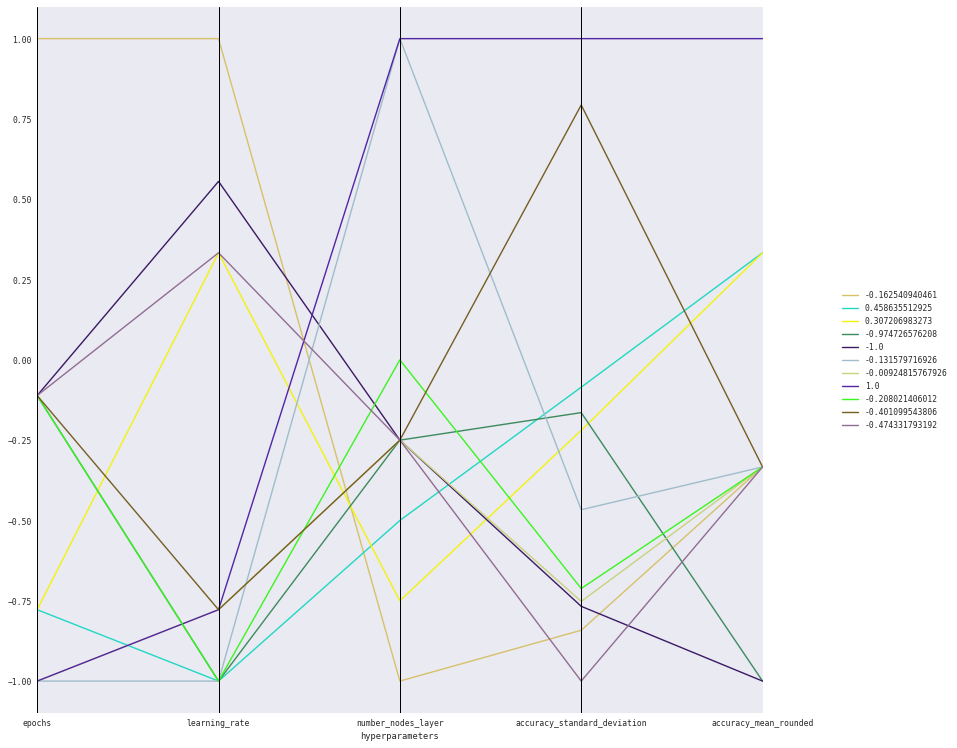

In [15]:
plt.rcParams["figure.figsize"] = (13, 13)
ax = pandas.plotting.parallel_coordinates(results_high_accuracy_scaled, "accuracy_mean")
ax.legend(loc = "center left", bbox_to_anchor = (1.1, 0.5))
#ax.legend().remove()
ax.set_xlabel("hyperparameters");

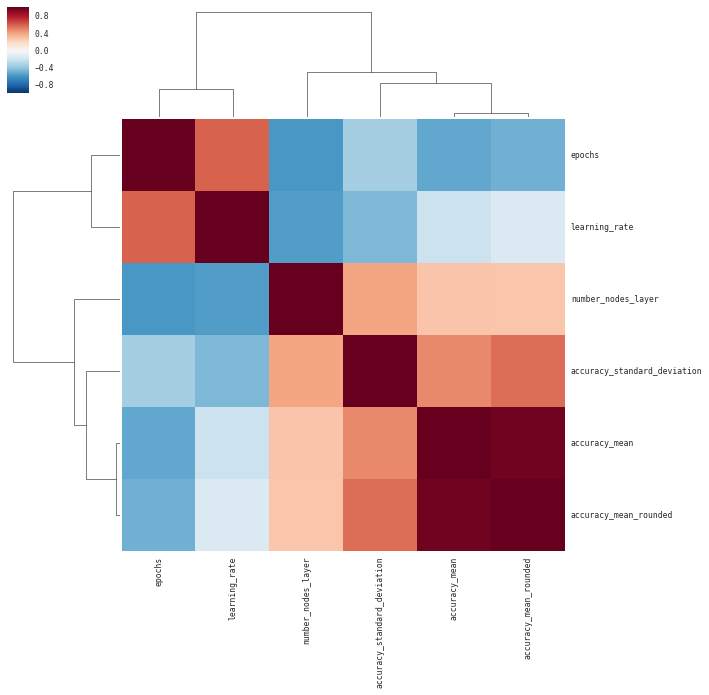

In [16]:
plot = sns.clustermap(results_high_accuracy_scaled.corr())
plt.setp(plot.ax_heatmap.get_yticklabels(), rotation = 0);

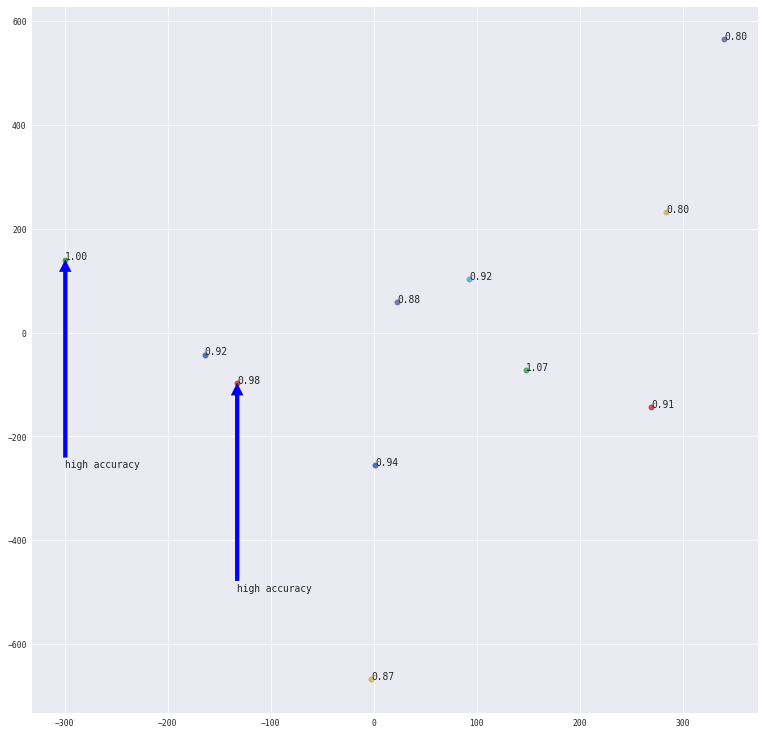

In [17]:
# split data table into data X and class labels y
X = results_high_accuracy_scaled[["epochs", "learning_rate", "number_nodes_layer", "accuracy_standard_deviation"]].values
y = results_high_accuracy[["accuracy_mean"]].values

# t-SNE
Y = sklearn.manifold.TSNE(
    n_components = 4,
    init         = "pca",
    method       = "barnes_hut"
).fit_transform(X)

plt.rcParams["figure.figsize"] = (13, 13)

for point, label in zip(Y, y):
    plt.scatter(point[0], point[1], label = label[0])
    if 1.05 > label[0] > 0.95:
        plt.axes().annotate(
            "high accuracy",
            xy         = (point[0], point[1]),
            xytext     = (point[0], point[1] - 400),
            arrowprops = dict(
                facecolor = "blue",
                shrink    = 5
            ),
        )
    #plt.axes().annotate(label[0], (point[0], point[1]))https://lysergi.com
    plt.axes().annotate("{number:.2f}".format(number = label[0]), (point[0], point[1]))

#plt.axes().set_xlim([-100, 100])
#plt.axes().set_ylim([-100, 100])
#plt.axes().set_aspect(1 / plt.axes().get_data_ratio())
#plt.legend(loc = "center left", bbox_to_anchor = (1, 0.5))
plt.show()